In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rainfall_dataset.csv")
df.head(10)

,Unnamed: 0,Year,Rainfall (mm),Yield (hg/ha),Remarks
0,0,1970,631.8,30197,Normal
1,1,1971,268.5,20698,Normal
2,2,1972,237.0,24388,Defict
3,3,1973,651.8,29976,Excess
4,4,1974,194.4,24745,Defict
5,5,1975,708.9,28703,Excess
6,6,1976,645.1,21741,Excess
7,7,1977,389.0,28516,Excess
8,8,1978,386.0,28037,Excess
9,9,1979,537.2,24954,Excess


In [47]:
x = df["Rainfall (mm)"]
y = df["Yield (hg/ha)"]
n = len(x)

y = a + b*x

b = n * sigma(x * y) - sigma(x) * sigma(y) / n * sigma (x^2) - (sigma(x))^2

a = sigma(y) - b * sigma(x) / n

In [48]:
sigma_x = x.sum()
sigma_y = y.sum()
sigma_xy = (x*y).sum()
sigma_x2 = (x**2).sum()

In [49]:
b = (n * sigma_xy - sigma_x * sigma_y) / (n * sigma_x2 - (sigma_x)**2)
b

8.97227438014803

In [50]:
a = (sigma_y - b * sigma_x) / n
a

17034.278167240926

In [51]:
predicted_yield = [a + b * x for x in x]

In [52]:
year = df['Year']

In [53]:
output = pd.DataFrame({'Prediction':predicted_yield})


In [54]:
# Concatenate the two DataFrames horizontally
combined_df = pd.concat([year, y, output], axis=1)
print(combined_df)

    Year  Yield (hg/ha)    Prediction
0   1970          30197  22702.961121
1   1971          20698  19443.333838
2   1972          24388  19160.707195
3   1973          29976  22882.406608
4   1974          24745  18778.488307
5   1975          28703  23394.723475
6   1976          21741  22822.292370
7   1977          28516  20524.492901
8   1978          28037  20497.576078
9   1979          24954  21854.183964
10  1980          30455  19279.141217
11  1981          28220  19541.131629
12  1982          31617  21109.485191
13  1983          31130  21672.944022
14  1984          31582  19012.664668
15  1985          30787  18708.504567
16  1986          35496  18604.426184
17  1987          40168  18514.703440
18  1988          40229  19893.742012
19  1989          39905  19761.849579
20  1990          42301  24400.515433
21  1991          41096  19120.331961
22  1992          41292  21753.694491
23  1993           6315  19115.845823
24  1994          10809  20587.298822
25  1995    

In [55]:
x1 = 560
y_pred = a + b * x1
y_pred

22058.75182012382

In [56]:
len(x),len(y)

(52, 52)

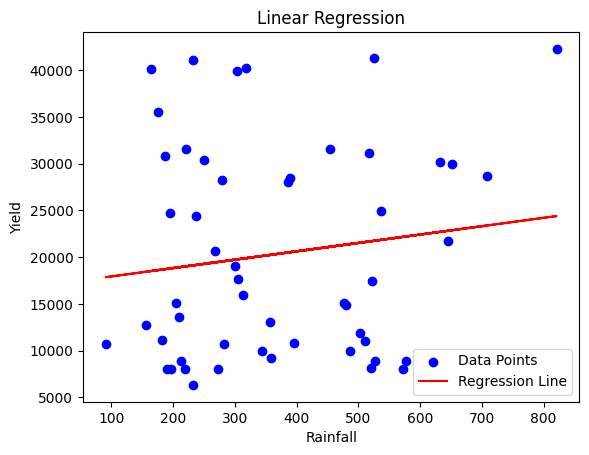

In [61]:
plt.scatter(x, y, color='blue', label='Data Points')  # Plot the data points
plt.plot(x, predicted_yield, color='red', label='Regression Line')  # Plot the regression line
plt.xlabel('Rainfall')  # Set the x-axis label
plt.ylabel('Yield')  # Set the y-axis label
plt.title('Linear Regression')  # Set the title of the plot
plt.legend()  # Display the legend
plt.show()  # Display the plot

In [62]:
df.head()

,Unnamed: 0,Year,Rainfall (mm),Yield (hg/ha),Remarks
0,0,1970,631.8,30197,Normal
1,1,1971,268.5,20698,Normal
2,2,1972,237.0,24388,Defict
3,3,1973,651.8,29976,Excess
4,4,1974,194.4,24745,Defict


In [63]:
x = df[["Rainfall (mm)"]]
y = df[["Yield (hg/ha)"]]

In [64]:
x['intercept'] = 1
x = x[['intercept', 'Rainfall (mm)']]

<ipython-input-64-d32c5ba1d483>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


In [65]:
x_transpose = x.T
x_transpose

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
intercept,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Rainfall (mm),631.8,268.5,237.0,651.8,194.4,708.9,645.1,389.0,386.0,537.2,...,480.0,522.0,304.8,300.0,197.0,191.0,220.0,213.0,487.0,503.0


In [66]:
b = np.linalg.inv(x_transpose @ x) @ x_transpose @ y
b.index = x.columns
b

,Yield (hg/ha)
intercept,17034.278167
Rainfall (mm),8.972274


In [67]:
predictions = x @ b
predictions

,Yield (hg/ha)
0,22702.961121
1,19443.333838
2,19160.707195
3,22882.406608
4,18778.488307
5,23394.723475
6,22822.292370
7,20524.492901
8,20497.576078
9,21854.183964


In [68]:
intercept = 17034.278167
Rainfall = 8.972274
x_find = 560

In [69]:
y_pred = intercept + x_find * Rainfall
y_pred

22058.751607000002